<a href="https://colab.research.google.com/github/SimonHegelich/Datenanalyse/blob/main/1_Da_Notebook_Lineare_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierübung: <font color='darkorange'> Lineare Regression </font>

##### <font color='darkorange'> Datenanalyse, Sommersemester 2021, Lehrstuhl für Political Data Science </font>
###### <font color='grey'> Disclaimer: Dieses Jupyter Notebooks sind als zusätzliches Material gedacht. Daher ersetzen sie nicht die Inhalte der Vorlesung oder Übung. Auch bilden sie nicht vollständig die Befehle ab, die in der Pflichtlektüre eingeführt werden und ersetzen diese damit nicht. Die zusätzlichen Links, die zur Verfügung gestellt werden, dienen als hilfreiche Stützen, allerdings wird ihre Vollständigkeit und Korrektheit nicht überprüft. </font>

### Teil 1) Regression händisch berechnen: 
Die Lineare Regression lässt sich analytisch (mit linearer Algebra) berechnen. Die Ableitung dazu schauen wir uns in der Übung an. Aber die Formel zur Berechnung der Betas ist am Ende: Die transponierte X-Matrix multipliziert mit X und dann die Inverse Matrix des Ergebnisses, das ganze multipliziert mit der transponierten X und dem Vektor Y, also β = ( X' X )^-1 X' Y

Zunächst erstellen wir unseren eigenen Datensatz. Dazu nehmen wir die gleichen Daten wie aus dem Arbeitsblatt.

Transponieren einer Matrix in R: t(x)

Inverse einer Matrix in R berechnen: solve(x) oder inv(x) aus dem Package $matlib$

Matrixmultiplikation in R mit: %*%

In [1]:
X =matrix(data=c(4,6,1,-4,-2,10,-1,0), nrow=8, ncol=1)
Y =matrix(data=c(1,4,0.5,-4,1,3.5,1.5,-2.5), nrow=8, ncol=1)

#### <font color='blue'> Aufgaben: 

<font color='blue'>1) X und Y plotten

2) Mit der in der oben beschriebenen Formel $\beta$ berechnen.

3) Zeichne die Regressionsgerade mit dem Befehl $abline$ in den Plot dazu. Wie der Befehl $abline$ funktioniert und welche Parameter er hat, findet ihr u.a. hier: [Abline](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/abline)

4) Wie gut beschreibt die berechnete Regressionsgerade den Datensatz?

5) Bitte verändere nun den Datensatz, also X und Y beliebig und gehe die Schritte nochmal durch.

Euren Plot in 1) und 3), sowie den Wert von 2) könnt ihr mit dem auf dem Übungsblatt vergleichen.

In [ ]:
#1)

In [ ]:
#2)

In [ ]:
#3)

In [ ]:
#4)

In [ ]:
#5)

### Teil 2) Regression in R berechnen 

Um eine Regression zu fitten brauchen wir kontinuierliche Daten, dass heißt, dass die Variablen kontinuiertlich erfasst wurden und nicht beispielsweise in Kategorien.
Der Datensatz für diese Woche enthält wirtschaftliche Daten aus Deutschland zwischen 1925 und 2020. 

Zunächst betrachten wir den Datensatz wieder explorativ. Wichtig für uns ist dabei herauszufinden, welche Variablen zur Verfügung stehen, wie die Variablen gemessen wurden und welche Variablen sich für eine Regression eignen.

Der erste Schritt dazu ist das einlesen des Datensatzes in das Jupyter Notebook. Dafür benutzen wir den Befehl $read.table$, da es sich um eine Textdatei ($txt$) handelt.

Die Daten habe ich von dieser Webseite herunter geladen: [Wirtschaftsdatensatz](https://www.destatis.de/DE/Themen/Wirtschaft/Volkswirtschaftliche-Gesamtrechnungen-Inlandsprodukt/Tabellen/inlandsprodukt-volkseinkommen1925-pdf.html)

Genauere Informationen zu den Variablenabkürzungen und für was diese stehen, habe ich in der unteren Tabelle zusammengestellt:

| Variablennamen | Inhalt der Variablen | 
| :- | -: |
| Jahr | Jahr der Erhebung; durch Kombinierung der Datensätze von 1925 bis 2020 | 
| BIP | Bruttoinlandsprodukt | 
| BIP_Prozent | Bruttoinlandsprodukt in Prozent | 
| BN_Produkt | Bruttoinlandsprodukt in den jeweiligen Preisen, in Mrd. Euro | 
| BN_Einkommen | Bruttonationaleinkommen in jeweiligen Preisen, in Mrd. Euro | 
| Volkseinkommen | Volkseinkommen in jeweiligen Preisen, in Mrd. Euro |
| BIP_pro_Kopf | Bruttoinlandsprodukt in jeweiligen Preisen je Einwohner, in Euro |
| BN_Einkommen_pro_Kopf |  Bruttonationaleinkommen in jeweiligen Preisen je Einwohner, in Euro | 
| Volkseinkommen_pro_Kopf |  Volkseinkommen in jeweiligen Preisen je Einwohner, in Euro | 

In [3]:
Wirtschaft = read.table(file = "https://raw.githubusercontent.com/SimonHegelich/Datenanalyse/main/Wirtschaftsdaten_complete.txt", sep = "", header = TRUE, dec = ",")
#dec gibt den Trenner von Dezimalzahlen an: in Deutschland wird ein , verwendet, in vielen anderen Ländern ein .

In [4]:
head(Wirtschaft, n = 4) #hier können wieder die ersten Zeilen des Datensatzes angeschaut werden
tail(Wirtschaft, n = 4)    #Auch das Ende des Datensatzes kann betrachtet werden. 

,Jahr,BIP,BIP_Prozent,BN_Produkt,BN_Einkommen,Volkseinkommen,BIP_pro_Kopf,BN_Einkommen_pro_Kopf,Volkseinkommen_pro_Kopf
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1925,0,0,0,41.6,34.0,0,1170,540
2,1926,0,0,0,43.6,35.6,0,1210,560
3,1927,0,0,0,48.7,39.9,0,1350,620
4,1928,0,0,0,52.1,42.9,0,1430,670


,Jahr,BIP,BIP_Prozent,BN_Produkt,BN_Einkommen,Volkseinkommen,BIP_pro_Kopf,BN_Einkommen_pro_Kopf,Volkseinkommen_pro_Kopf
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
82,2017,104.89,2.6,3259.86,3337.200,2436.537,39438,40374,29478
83,2018,106.22,1.3,3356.41,3447.411,2510.109,40485,41582,30277
84,2019,106.81,0.6,3449.05,3542.818,2564.131,41508,42637,30859
85,2020,101.58,-4.9,3332.23,3427.144,2492.685,40072,41213,29976


Wir sehen, dass hier die letzte Zeile vollkommen leer ist und dadurch wenig zum Datensatz beiträgt und eher störend sein könnte. Daher entfernen wir diese Zeile und überschreiben den ursprünglichen Datensatz mit dem Datensatz ohne die letzte Zeile.

In [5]:
Wirtschaft <- Wirtschaft[-c(86),]

In [6]:
str(Wirtschaft) 

'data.frame':	85 obs. of  9 variables:
 $ Jahr                   : int  1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 ...
 $ BIP                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BIP_Prozent            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BN_Produkt             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BN_Einkommen           : num  41.6 43.6 48.7 52.1 52.3 48.8 40.8 33.6 34.5 38.8 ...
 $ Volkseinkommen         : num  34 35.6 39.9 42.9 42.9 39.3 31.9 25.3 26.1 29.9 ...
 $ BIP_pro_Kopf           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BN_Einkommen_pro_Kopf  : int  1170 1210 1350 1430 1430 1330 1100 900 920 1030 ...
 $ Volkseinkommen_pro_Kopf: int  540 560 620 670 660 600 490 380 400 450 ...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




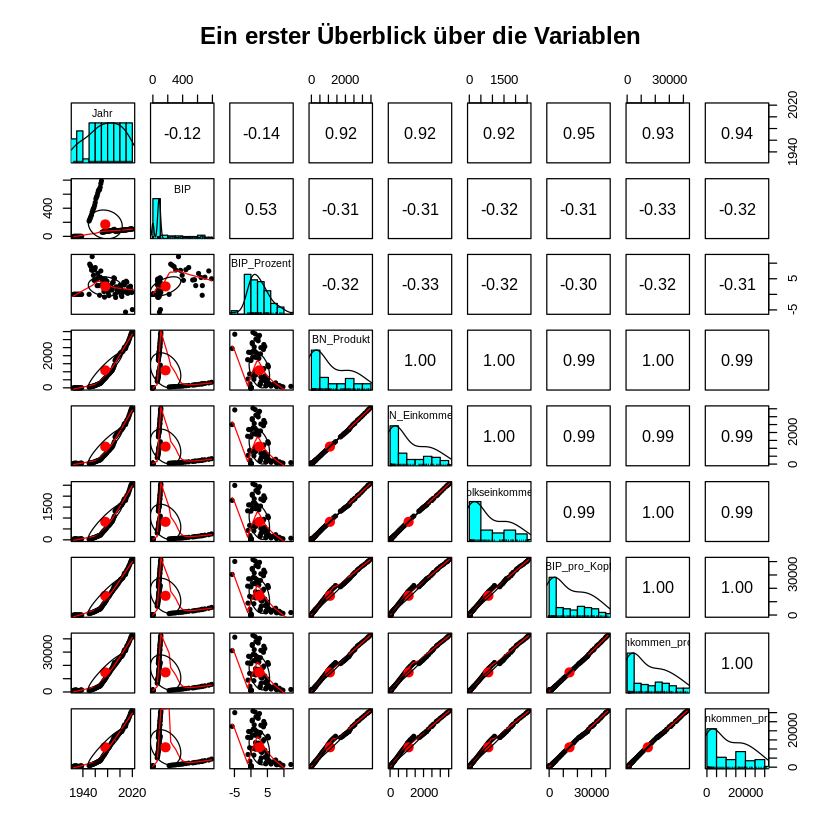

In [8]:
install.packages("psych")
library(psych)
pairs.panels(Wirtschaft, main = "Ein erster Überblick über die Variablen")

Wir möchten nun versuchen mit dem Jahr der Messung das Bruttoinlandsprodukt (in Prozent) vorher zu sagen. Eine Regression stellt dabei den Versuch dar, einen vereinfachten Zusammenhang zwischen der unabhängigen Variable $Jahr$ und der abhängigen Variable $BIP\_Prozent$ zu finden. Dieser wird mit Hilfe einer Gleichung beschrieben, wobei mit der Gleichung u.a. versucht werden kann weitere Ereignisse vorher zu berechnen.

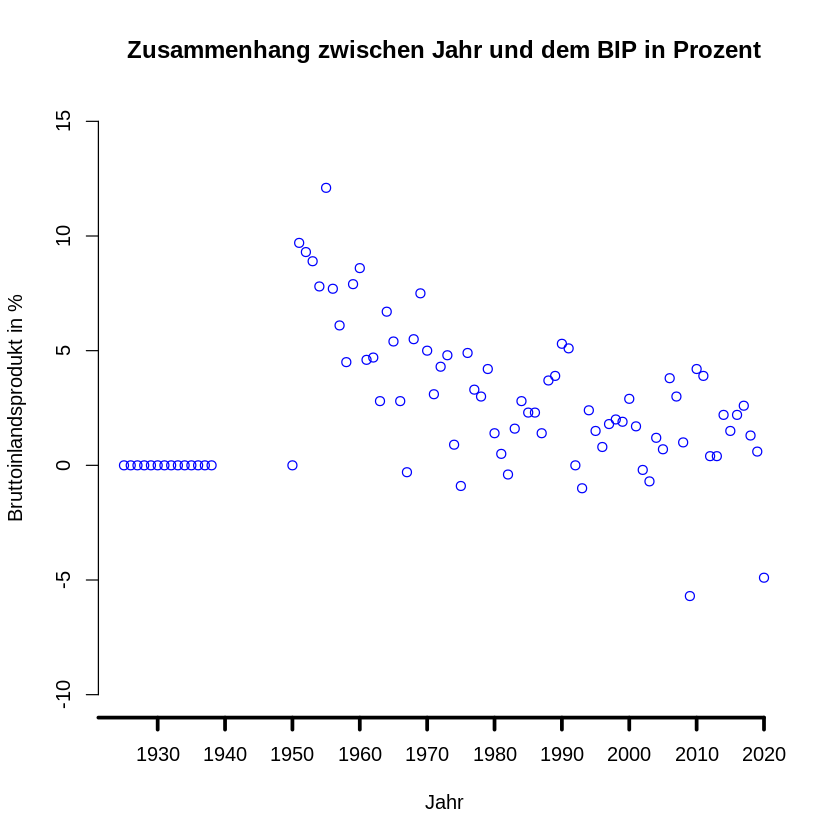

In [9]:
plot(Wirtschaft$Jahr, Wirtschaft$BIP_Prozent, 
     type = "p",
    xlab = "Jahr",
    ylab = "Bruttoinlandsprodukt in %",
     ylim = c(-10,15),
    main = "Zusammenhang zwischen Jahr und dem BIP in Prozent",
    xaxt="n", 
     #yaxt = "n", 
     bty = "n",
    col = "blue")
axis(side=1,at=seq(1910,2020,10),lwd=3)

####  Berechnung der Regression mit R 

(Intercept)           X 
  33.821845   -0.015827


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7254 -2.8204 -0.1995  1.8149  9.2199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 33.82185   24.19498   1.398    0.166
X           -0.01583    0.01224  -1.293    0.200

Residual standard error: 3.085 on 83 degrees of freedom
Multiple R-squared:  0.01974,	Adjusted R-squared:  0.00793 
F-statistic: 1.671 on 1 and 83 DF,  p-value: 0.1997


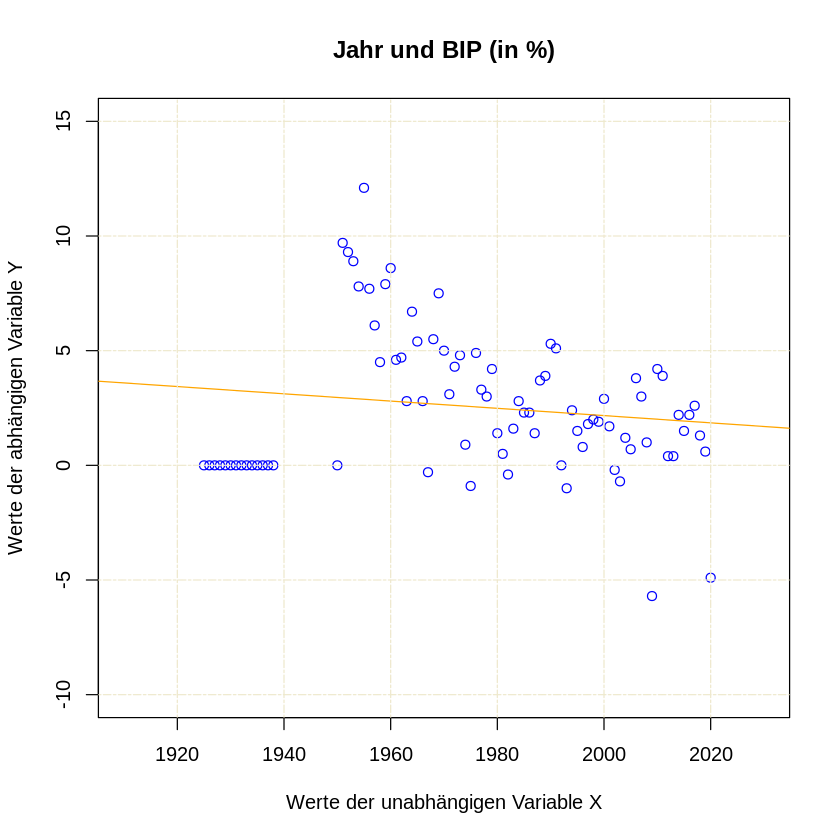

In [10]:
X = as.matrix(Wirtschaft$Jahr)
Y = as.matrix(Wirtschaft$BIP_Prozent)

reg1 = lm(Y ~ X)
reg1$coefficients 

plot(X,Y,xlim = c(1910, 2030),ylim = c(-10, 15),col = "blue",main = "Jahr und BIP (in %)",
    xlab = "Werte der unabhängigen Variable X", ylab = "Werte der abhängigen Variable Y")
abline(lm(Y ~ X), col = "orange")
grid (NULL, lty = 6, col = "cornsilk2")
summary(reg1)

In unserem Plot sehen wir, dass dass Bruttoinlandsprodukt bis zum Jahr 1950 nicht gemessen wurde.

#### <font color='blue'> Aufgaben: 

<font color='blue'>
1) Entferne die Zeilen aus der Matrix, die die Jahre 1925 bis 1938 enthalten.
    
2) Gebe die ersten Zeilen des neuen Datensatzes aus.

3) Fitte erneut eine lineare Regression auf dem verkleinerten Datensatz.

4) Gebe den Plot aus, mit der eingezeichneten Regressionslinie.

5) Wie hat sich die Regressionsgerade verändert? Hat sie sich überhaupt verändert? Ist die Veränderung positiv oder negativ?

In [ ]:
#1)

In [ ]:
#2)

In [ ]:
#3)

In [ ]:
#4)

In [ ]:
#5)

# Problematik des Overfitting

#### Aufteilen in Test- und Trainingsdatensatz
Manuelle Aufteilung

In [12]:
dt = sort(sample(nrow(Wirtschaft), nrow(Wirtschaft)*.7))
train<-Wirtschaft[dt,]
test<-Wirtschaft[-dt,]

head(train)
head(test)

,Jahr,BIP,BIP_Prozent,BN_Produkt,BN_Einkommen,Volkseinkommen,BIP_pro_Kopf,BN_Einkommen_pro_Kopf,Volkseinkommen_pro_Kopf
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1925,0,0,0,41.6,34.0,0,1170,540
4,1928,0,0,0,52.1,42.9,0,1430,670
6,1930,0,0,0,48.8,39.3,0,1330,600
9,1933,0,0,0,34.5,26.1,0,920,400
11,1935,0,0,0,43.2,33.7,0,1140,500
12,1936,0,0,0,47.9,37.9,0,1260,560


,Jahr,BIP,BIP_Prozent,BN_Produkt,BN_Einkommen,Volkseinkommen,BIP_pro_Kopf,BN_Einkommen_pro_Kopf,Volkseinkommen_pro_Kopf
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2,1926,0,0,0,43.6,35.6,0,1210,560
3,1927,0,0,0,48.7,39.9,0,1350,620
5,1929,0,0,0,52.3,42.9,0,1430,660
7,1931,0,0,0,40.8,31.9,0,1100,490
8,1932,0,0,0,33.6,25.3,0,900,380
10,1934,0,0,0,38.8,29.9,0,1030,450


#### <font color='blue'> Aufgaben: 

<font color='blue'>
1) Fitte die Regression nun nochmal allein auf den Trainingsdaten.
    
2) Gebe die ersten Zeilen sowohl des Test- als auch des Trainingsets aus.

3) Fitte erneut eine lineare Regression auf dem Trainingsdatensatz.

4) Versuche nun die y-Werte für den Testdatensatz mit Hilfe der auf den Trainingsdaten gefitteten Regression zu berechnen.
    
5) Gebe die neuen y-Werte (y_Pred) aus.

In [ ]:
#1)

In [ ]:
#2)

In [ ]:
#3)

In [ ]:
#4)

In [ ]:
#5)

#### <font color='blue'> (Zusatz-)Aufgaben: Vorhersage für die nächsten Jahre #
    

<font color='blue'>
Nun können wir noch versuchen das Bruttoinlandsprodukt $BIP\_Prozent$ für die nächsten Jahre vorherzusagen. 

In [ ]:
#Lösung

### <font color='darkorange'> Zugehörige Seiten in der Pflichtlektüre: </font> 
Ab "3.6 Lab: Linear Regression", S.109